# Data Cleaning and EDA Notebook for the Healthcare Dataset

This notebook performs data cleaning and EDA over the healthcare dataset that will be used for our BI project to build a solution to selected business problems. 
The business problems that we will address is as follows: <br>
Are there any specific age groups, genders, or blood groups that are more frequently associated with high-cost conditions? <br>
Addressing this problem will facilitate in improving preventive care and treatment approaches targetting specific groups of patients.
Before we begin, let's first take a look at our dataset.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano

In [45]:
df = pd.read_csv('healthcare_dataset.csv')

In [46]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [47]:
df.shape

(55500, 15)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [49]:
df.describe(include='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


# 1. Data Inconsistencies and Data Entry Errors

In [50]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


From the above, we can see that patient names have incorrect capitalization. We will create a function to fix name capitalization and apply it to both patient names and doctor names (Even though we do not observe incorrect capitalization in doctor names above, there may still be other values with incorrect capitalization in the column).

In [51]:
def fix_name_capitalization(name):
    return ' '.join([part.capitalize() for part in str(name).split()])

In [52]:
df['Name'] = df['Name'].apply(fix_name_capitalization)
df['Doctor'] = df['Doctor'].apply(fix_name_capitalization)

In [53]:
df[df['Name'] == 'Christina Martinez']

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
7,Christina Martinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
27975,Christina Martinez,74,Male,AB+,Diabetes,2022-01-08,Patricia Williams,"Stephens and Clark, Mann",Aetna,6631.126917,246,Emergency,2022-01-19,Penicillin,Abnormal
32052,Christina Martinez,41,Male,O+,Arthritis,2021-09-26,Matthew Glover,Sons and Miller,UnitedHealthcare,18892.309155,280,Emergency,2021-10-07,Ibuprofen,Inconclusive


In [54]:
df.shape

(55500, 15)

In [55]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Next, for each categorical column (except for hospital, since it is not a column defining a specific category, and has names of 30,000+ different hospitals), we will determine whether it contains valid labels. We will identify unique values in the column and fix any issues with the category labels (such as different spellings for the same label).

Gender

In [56]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

We can see that the labels in the Gender column are 'Male' and 'Female', which is correct.

Blood Type

In [57]:
df['Blood Type'].value_counts()


Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

The Blood Type column also contains the correct labels.

Medical Condition

In [58]:
df['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

There are no issues in the labels of the Medical Condition column.

Insurance Provider

In [59]:
df['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

The insurance provider column also has correct labels.

Admission Type

In [60]:
df['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

We can see that there are no problems with the Admission Type labels.

Medication

In [61]:
df['Medication'].value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

The above medications are all valid.

Test Results

In [62]:
df['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

The labels for the Test Results column are also all valid.

We have verified that all the categorical columns contain valid category labels. Next, we will convert the Date of Admission and Discharge Date to a datetime type and then calculate a new metric, Length of Stay, by subtracting Date of Admission from Discharge Date. This is an important metric for analysing how other metrics may vary.

In [63]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True, errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], dayfirst=True, errors='coerce')

C:\Users\uzair\AppData\Local\Temp\ipykernel_29408\3353114928.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True, errors='coerce')


In [64]:
df["Length of Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

Now, we need to remove rows with a negative length of stay and a negative billing amount, since these are not valid values, and will lead to incorrect analysis if not removed.

In [65]:
df = df[(df["Billing Amount"] >= 0) & (df["Length of Stay"] >= 0)]

It is also important to make sure that the numerical columns have the correct data type. Age and Length of Stay should be integers, and billing should be a float. 

In [66]:
df.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Length of Stay               float64
dtype: object

We can see that Length of Stay is a float. We will convert it to the integer data type.

In [67]:
df['Length of Stay'] = df['Length of Stay'].astype(int)

In [68]:
df.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Length of Stay                 int64
dtype: object

All columns now have the correct data type.

# 3. Missing Values and Duplicate Rows

We will confirm if missing values exist in any of the columns.

In [69]:
df.isnull().sum()


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length of Stay        0
dtype: int64

As can be seen, the dataset contains no missing values. We will now count the number of duplicate rows in the dataset.

In [70]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 105


There are 105 duplicate rows in the dataset. We will drop these rows.

In [71]:
df = df.drop_duplicates()

In [72]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


We have deleted the duplicate rows. We have also dealt with negative billing amounts and corrected the data type of the date columns. The dataset is now ready for further processing.

# 4. Univariate Analysis

We will analyze the frequency distributions of each column in the dataset.

In [73]:
import seaborn as sns

Billing Amount

In [74]:
df['Billing Amount'].describe()

count    11720.000000
mean     25689.918196
std      14157.951520
min         23.727930
25%      13629.104257
50%      25686.297622
75%      37860.337229
max      52271.663747
Name: Billing Amount, dtype: float64

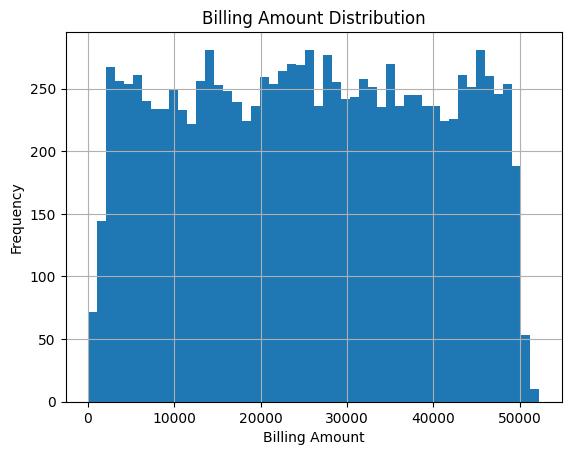

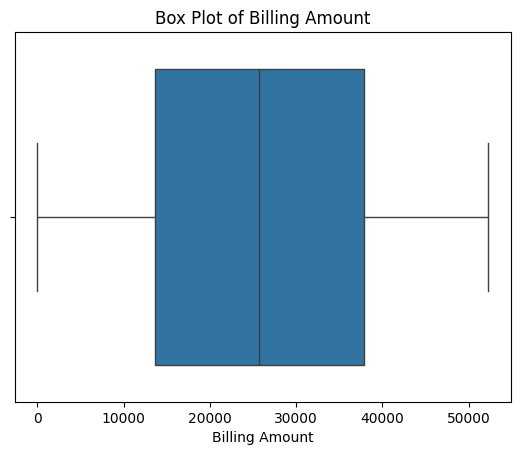

In [75]:
df['Billing Amount'].hist(bins=50)
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['Billing Amount'])
plt.title('Box Plot of Billing Amount')
plt.xlabel('Billing Amount')
plt.show()

As can be seen from the histogram and boxplot above, the billing amount has a relatively even distribution and most values have similar frequencies. The column also does not contain outliers.

Length of Stay

In [76]:
df['Length of Stay'].describe()

count    11720.000000
mean       121.472014
std         86.126638
min          0.000000
25%         49.000000
50%        107.000000
75%        181.000000
max        354.000000
Name: Length of Stay, dtype: float64

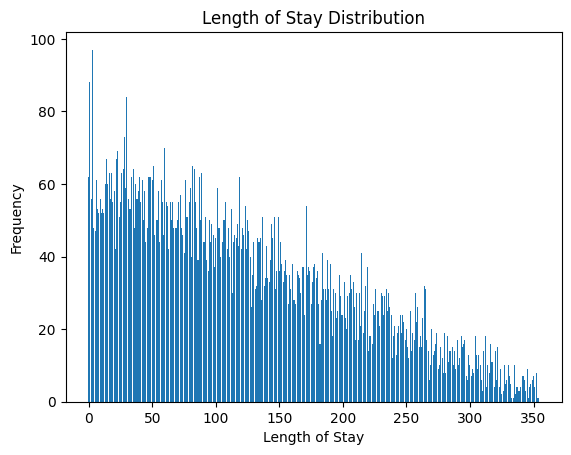

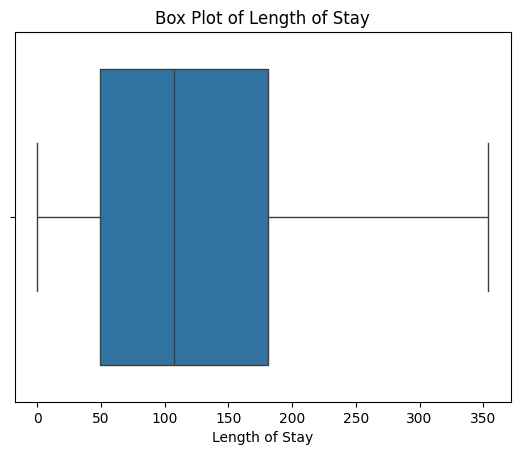

In [77]:
plt.hist(df['Length of Stay'], bins=range(df['Length of Stay'].min(), df['Length of Stay'].max() + 2), align='left', rwidth=0.8)
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['Length of Stay']) 
plt.title('Box Plot of Length of Stay')
plt.xlabel('Length of Stay')
plt.show()



We can see that Length of Stay is positively skewed, showing that most stays are on the lower end (between 0-50 days). The boxplot shows that there are no outliers.

Age

In [78]:
df['Age'].describe()

count    11720.000000
mean        51.656826
std         19.586549
min         13.000000
25%         35.000000
50%         52.000000
75%         69.000000
max         88.000000
Name: Age, dtype: float64

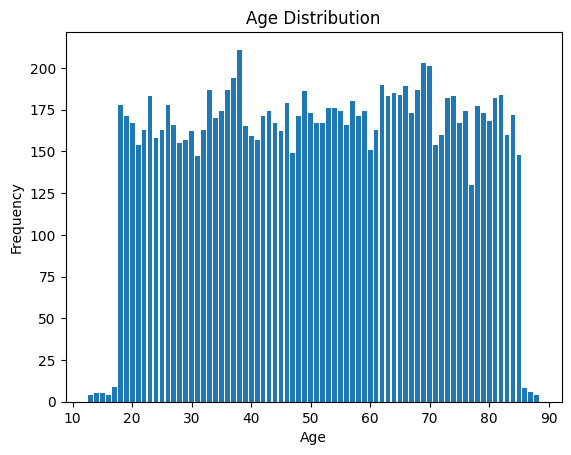

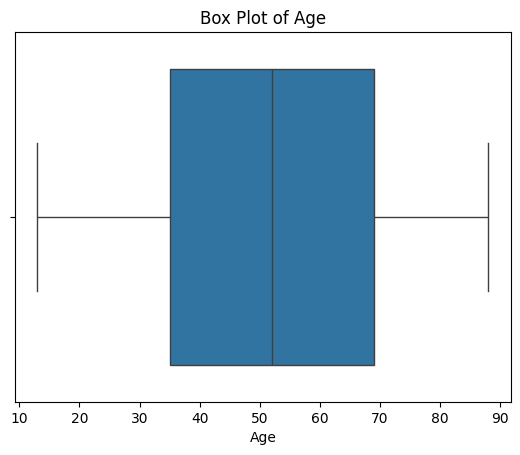

In [79]:

plt.hist(df['Age'], bins=range(df['Age'].min(), df['Age'].max() + 2), align='left', rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


Again, we can see that patient ages are evenly distributed with most age groups having a similar frequency. Patients in the lower age bracket (below 18) and in the higher age bracket (above 85) are few in number. Similar to Billing Amount, this column does not have outliers.

Gender

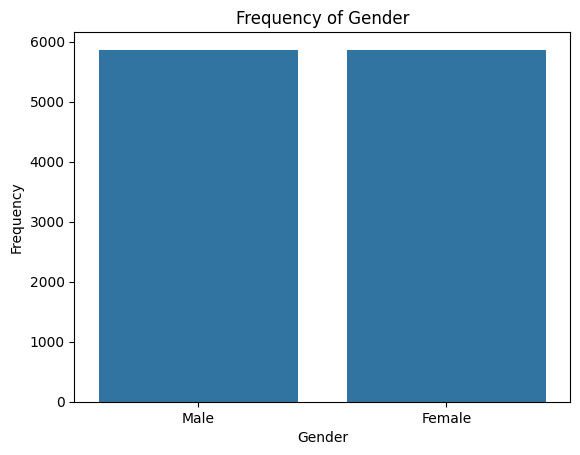

In [80]:
sns.countplot(x='Gender', data=df)
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

The countplot shows that Males and Females are almost equal in number.

Blood Type

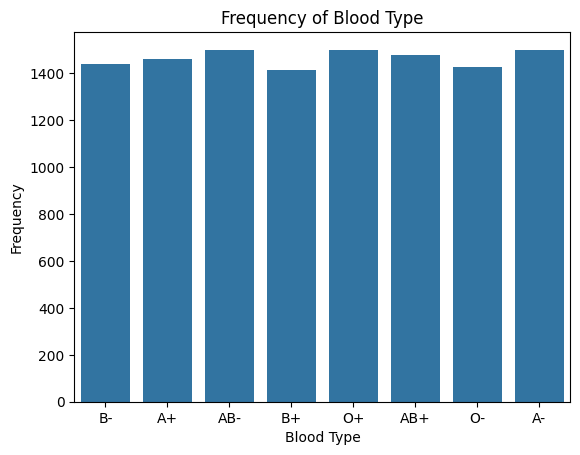

In [81]:
sns.countplot(x='Blood Type', data=df)
plt.title('Frequency of Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Frequency')
plt.show()

We can see that all blood types have a similar frequency. There are no blood types that are extremely more prevalent or less prevalent in patients. However, we can see that blood of type B+ is slightly less common.

Medical Condition

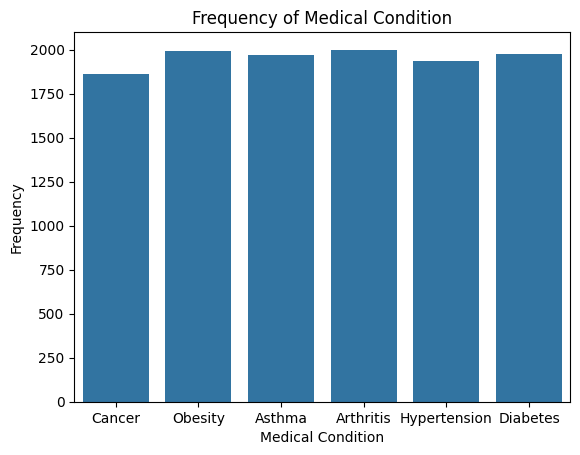

In [82]:
sns.countplot(x='Medical Condition', data=df)
plt.title('Frequency of Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Frequency')
plt.show()

Once again, we see that the data is almost uniformly distributed between medical conditions, with cancer having a slightly lower frequency.

Admission Type

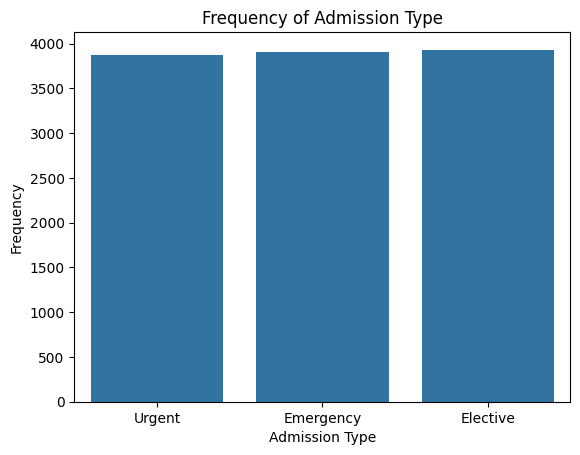

In [83]:
sns.countplot(x='Admission Type', data=df)
plt.title('Frequency of Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.show()

Each admission type is similarly distributed in the dataset.

Medication

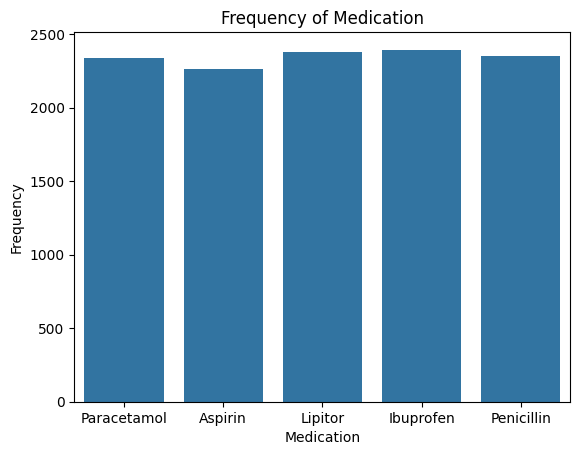

In [84]:
sns.countplot(x='Medication', data=df)
plt.title('Frequency of Medication')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.show()

As with all columns before Medication, each Medication is nearly evenly distributed in the data, with Aspirin being slightly less used/prescribed.

Test Results

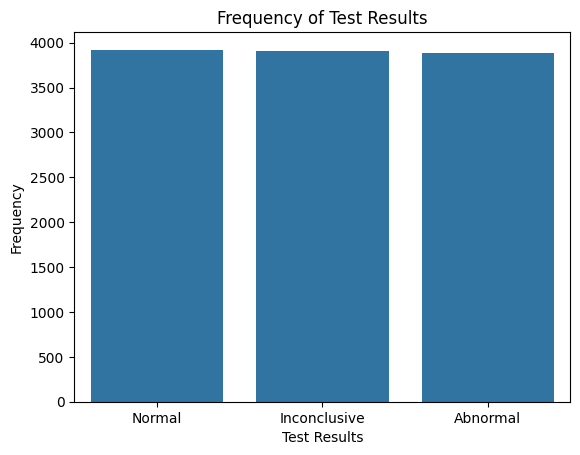

In [85]:
sns.countplot(x='Test Results', data=df)
plt.title('Frequency of Test Results')
plt.xlabel('Test Results')
plt.ylabel('Frequency')
plt.show()

Finally, for the Test Results, we can see that it also has a uniform distribution between its categories. 

We have seen the frequency distributions of each column and found that all columns have a relatively uniform distribution of values. We can now move on to Bi/Multi-variate analysis relevant to our business problem.

# 5. Bi/Multivariate Analysis

In this section, we will analyze the relationships between different variables to get a better look at how these variables come together and affect each other.

In [86]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
7,Christina Martinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-07-01,Paracetamol,Inconclusive,185
15,Ms. Natalie Gamble,46,Female,AB-,Obesity,2023-01-01,Maria Dougherty,Cline-Williams,Blue Cross,12263.357425,465,Elective,2023-11-01,Aspirin,Inconclusive,304
21,Christopher Bright,48,Male,B+,Asthma,2020-01-21,Gregory Smith,Williams-Davis,Aetna,17695.911622,295,Urgent,2020-09-02,Lipitor,Normal,225
22,Kathryn Stewart,58,Female,O+,Arthritis,2022-05-12,Vanessa Newton,Clark-Mayo,Aetna,5998.102908,327,Urgent,2022-10-06,Lipitor,Inconclusive,147


Correlation between numerical attributes

First, we will generate a correlation heatmap to identify the association between numerical variables. The heatmap will generate a coefficient between -1 and 1 for each pair of numerical columns which will indicate the strength of the relationship between them. The closer this value is to 1, the stronger the positive correlation (when one variable increases, the other also increases). The closer it is to -1, the stronger the negative correlation (when one variable increases, the other decreases).

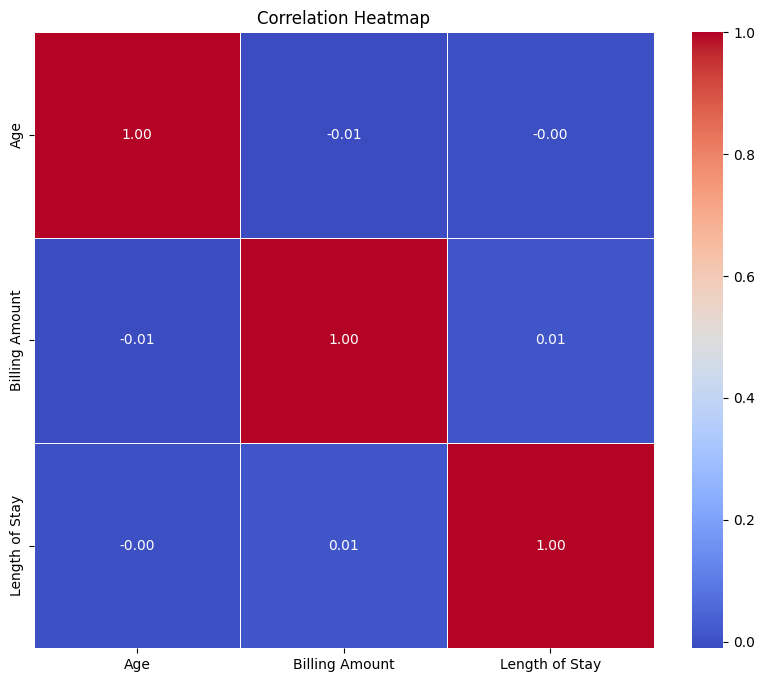

In [87]:
numeric_data = df.select_dtypes(include=['number']).drop(columns=['Room Number'])
corr_matrix = numeric_data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows that all correlation coefficients are either 0 or 0.01, indicating that there is almost no correlation between Age, Billing Amount, and Length of Stay. These variables are independent of each other, which means that changes in one variable do not affect the value of any of the other variables.

Regression

Regression is a statistical modelling technique used to estimate the relationship between a dependent variable and one or more independent variables in the form of an equation.
When the dependent variable is numerical, linear regression is used.
We want to analyze how certain age groups, genders, or blood types correlate to high costs. We will model Billing Amount as a function of these variables. 

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Encoding the Gender and Blood Type columns as numerical values to use in the model
X = pd.get_dummies(df[['Age', 'Gender', 'Blood Type']], drop_first=True)
y =  df['Billing Amount']
model.fit(X,y)
print (model.intercept_, model.coef_, model.score(X,y))

26554.723395899167 [   -8.6006889    403.35597619  -270.56880285 -1166.35342854
  -418.15819343 -1109.10971049  -236.44294551 -1694.60425149
   -59.80995572] 0.0019881150946309267


We can see that we have an intercept of 26554.72 and multiple coefficients. The results show an R-score of 0.00198 or 0.198%, which means only about 0.2% of the variation can be explained by the independent variables in the model (Age, Gender, and Blood Type).

ANOVA Tests

ANOVA testing is done to determine if for a categorical variable, there is a difference between the means of different groups in the variable for a particular numerical variable. It uses a null hypothesis and an alternate hypothesis. 
H0 (Null Hypothesis): All the population means are equal.
H1 (Alternate Hypothesis): Atleast one population mean is different from the rest.

The null hypothesis is accepted or rejected based on a p value that is calculated. If this value is less than a selected critical value, we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

We will identify if there is a difference between the means in billing amounts of different groups in the Blood Type and Age columns. For testing patient ages, we will create a new column which will categorize patients to a certain age group. A critical value of 0.05 will be used.

Billing Amount and Blood Type

In [90]:
model = ols('Q("Billing Amount") ~ C(Q("Blood Type"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nAnova => Billing Amount - Blood Type")
display(anova_table)


Anova => Billing Amount - Blood Type


,sum_sq,df,F,PR(>F)
"C(Q(""Blood Type""))",3.864855e+09,7.0,2.757338,0.007327
Residual,2.345180e+12,11712.0,NaN,NaN


We can see that the P-value, 0.007, is significantly less than the critical value, 0.05. This means that a difference in the means of different blood groups exists. We will now perform a Tukey test, which tells us exactly which pairs of blood groups have a statistically significant difference between their mean billing amounts.

Tukey Test for Blood Type

We will filter the results to only show pairs with a statistically significant difference between their means.

In [91]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Billing Amount'],
                          groups=df['Blood Type'],
                          alpha=0.05)

tukey_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
significant_results = tukey_results[tukey_results['reject'] == True]
print(significant_results)

   group1 group2   meandiff   p-adj      lower      upper  reject
5      A+     O+ -1681.2030  0.0271 -3257.9736  -104.4323    True
27     O+     O-  1610.1669  0.0436    24.1936  3196.1401    True


From the results of the Tukey Test, we can observe that there is a significant difference between the mean billing amounts of blood groups A+ and O+, and groups O+ and O-.

Billing Amount and Age Group

We will first create a column named 'Age Group' using patient ages.

In [92]:

bins = [12, 19, 30, 50, 69, 88]  
labels = ['Teen', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
print(df[['Age', 'Age Group']].head())


    Age    Age Group
0    30  Young Adult
7    20  Young Adult
15   46        Adult
21   48        Adult
22   58  Middle-aged


Now, we will conduct an ANOVA test.

In [93]:
model = ols('Q("Billing Amount") ~ C(Q("Age Group"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nAnova => Billing Amount - Age Group")
display(anova_table)


Anova => Billing Amount - Age Group


,sum_sq,df,F,PR(>F)
"C(Q(""Age Group""))",7.085412e+08,4.0,0.883664,0.472664
Residual,2.348337e+12,11715.0,NaN,NaN


We can see that the p-value, 0.47, is greater than the critical value, 0.05. This means that there is not enough evidence to suggest that there is a significant difference between the billing amount means of certain age groups.

T-Test

The T-test is similar to the ANOVA test, but is used when a categorical column has exactly two categories. We will compare the mean billing amounts for Males and Females using the T-test.

In [94]:
from scipy import stats

group1 = df[df['Gender'] == 'Male']['Billing Amount']
group2 = df[df['Gender'] == 'Female']['Billing Amount']

t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')

print("T-test => Billing Amount - Gender")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-test => Billing Amount - Gender
T-statistic: 1.4199, P-value: 0.1557


We can see that the p-value, 0.15, is greater than 0.05. This means that Gender is not statistically significant in explaining the variance in billing amount, and there is not enough evidence to suggest that a difference in the mean billing amount of Males and Females exists.

Chi-Square Test

The Chi-Square test determines the relationship between two categorical variables. Similar to the ANOVA and Tukey tests, it uses a p value and a critical value to accept or reject a null hypothesis, which states that the two variables are independent.

Blood Groups and Medical Conditions

First, we will determine if there is a correlation between different blood groups and medical conditions.

In [95]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

data_crosstab = pd.crosstab(df['Blood Type'], df['Medical Condition'], 
margins = False) 
print(data_crosstab) 

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Blood Type                                                                   
A+                       264     231     226       253           236      251
A-                       227     276     239       250           252      254
AB+                      225     278     238       249           246      242
AB-                      257     239     252       243           240      270
B+                       253     219     213       269           229      232
B-                       254     236     223       218           250      258
O+                       260     267     246       250           241      236
O-                       259     221     222       240           239      247


This is the data crosstab, which lists the number of all combinations of values of these columns.

In [96]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

alpha = 0.05
print('critical value=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=35
[[249.19274744 245.20366894 231.74052901 245.82696246 240.96527304
  248.07081911]
 [255.50358362 251.41348123 237.60938567 252.05255973 247.06774744
  254.35324232]
 [252.09232082 248.05682594 234.43703072 248.68737201 243.76911263
  250.95733788]
 [256.01527304 251.91697952 238.08523891 252.55733788 247.56254266
  254.86262799]
 [241.346843   237.48336177 224.44411263 238.08703072 233.37841297
  240.26023891]
 [245.44035836 241.51134812 228.25093857 242.12525597 237.33677474
  244.33532423]
 [255.8447099  251.74914676 237.92662116 252.3890785  247.39761092
  254.69283276]
 [243.56416382 239.66518771 226.50614334 240.27440273 235.5225256
  242.46757679]]
critical value=0.050, p=0.486
Independent (fail to reject H0)


Since the p-value is greater than 0.486, we can not reject the null hypothesis, which means that Blood Type and Medical Condition are independent.

Gender and Medical Condition

Next, we will determine if Medical Condition is related to Gender.

In [97]:
data_crosstab = pd.crosstab(df['Gender'], df['Medical Condition'], 
margins = False) 

stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

alpha = 0.05
print('critical value=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
[[ 998.81774744  982.82866894  928.86552901  985.32696246  965.84027304
   994.32081911]
 [1000.18225256  984.17133106  930.13447099  986.67303754  967.15972696
   995.67918089]]
critical value=0.050, p=0.858
Independent (fail to reject H0)


Once again, we see that the p-value is greater than 0.05, which means that Gender and Medical Condition are independent. 

Age Group and Medical Condition

Finally, we will determine if Age Group and Medical Condition are correlated.

In [98]:
data_crosstab = pd.crosstab(df['Age Group'], df['Medical Condition'], 
margins = False) 

stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

alpha = 0.05
print('critical value=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=20
[[ 64.13174061  63.10511945  59.64027304  63.26552901  62.01433447
   63.84300341]
 [308.03703072 303.1059727  286.46365188 303.87645051 297.86672355
  306.65017065]
 [587.7605802  578.35170648 546.59675768 579.821843   568.35477816
  585.11433447]
 [572.92158703 563.75025597 532.79701365 565.18327645 554.00571672
  570.34215017]
 [466.14906143 458.68694539 433.50230375 459.85290102 450.7584471
  464.0503413 ]]
critical value=0.050, p=0.049
Dependent (reject H0)


We can see that the p-value is less than 0.05, which means that we reject the null hypothesis. Age Group and Medical Condition are dependent.

Exporting the Dataset To a New CSV

We have performed thorough data wrangling on the dataset, eliminating inconsistencies and data entry errors where found and conducting EDA to understand the data better. Now, we will export the clean and improved dataset into an excel file so that it can be used for further analysis. 

In [99]:
#df.to_csv('Healthcare_Dataset_Cleaned.csv')